<a href="https://colab.research.google.com/github/socialsahayak/socialAIApp/blob/main/social_sahayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyarrow==12.0.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 12.0.1 which is incompatible.
pylibcudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 12.0.1 which is incompatible.


In [3]:
# Step 1: Install Required Libraries
!pip install tqdm pandas matplotlib langchain langchain-community torch pyngrok

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Import Libraries
import pandas as pd
from tqdm.notebook import tqdm
# from datasets import Dataset
import matplotlib.pyplot as plt
from langchain.docstore.document import Document as LangchainDocument
from langchain.text_splitter import RecursiveCharacterTextSplitter
# from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import torch

# Example usage of imported libraries
# This is just a placeholder to show that the imports are working fine
print("Libraries imported successfully!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.21
    Uninstalling langchain-core-0.3.21:
      Successfully uninstalled langchain-core-0.3.21
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.9
    Uninstalling langchain-0.3.9:
      Successfully uninstalled langchain-0.3.9
Mounted at /content/drive
Libraries imported successfully!


In [4]:
pip install PyPDF2 python-docx pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 25.3 MB/s eta 0:00:00


In [5]:
# # Importing necessary libraries
# import os
# import pandas as pd
# from PyPDF2 import PdfReader
# from docx import Document
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from transformers import AutoTokenizer
# from typing import Optional, List

# # Function to read PDF files
# def read_pdf(file_path):
#     reader = PdfReader(file_path)
#     text = ""
#     for page in reader.pages:
#         text += page.extract_text()
#     return text

# # Function to read DOCX files
# def read_docx(file_path):
#     doc = Document(file_path)
#     text = "\n".join([para.text for para in doc.paragraphs])
#     return text

# # Function to read CSV files
# # def read_csv(file_path):
# #     df = pd.read_csv(file_path)
# #     # Convert CSV rows into structured text format
# #     text = "\n".join([", ".join([f"{col}: {row[col]}" for col in df.columns]) for _, row in df.iterrows()])
# #     return text

# # Function to read XLSX files
# # def read_xlsx(file_path):
# #     df = pd.read_excel(file_path)
# #     # Convert Excel rows into structured text format
# #     text = "\n".join([", ".join([f"{col}: {row[col]}" for col in df.columns]) for _, row in df.iterrows()])
# #     return text

# # Function to read files based on extension
# def read_file(file_path):
#     extension = os.path.splitext(file_path)[1].lower()
#     if extension == ".txt":
#         with open(file_path, "r") as file:
#             return file.read()
#     elif extension == ".pdf":
#         return read_pdf(file_path)
#     elif extension == ".docx":
#         return read_docx(file_path)
#     elif extension == ".csv":
#         return read_csv(file_path)
#     # elif extension == ".xlsx":
#     #     return read_xlsx(file_path)
#     else:
#         raise ValueError(f"Unsupported file type: {extension}")

# # Process multiple files
# file_paths = ["placements.txt","final_pdf.pdf","administration.pdf"]
# RAW_KNOWLEDGE_BASE = []
# for file_path in file_paths:
#     file_content = read_file(file_path)
#     RAW_KNOWLEDGE_BASE.append(LangchainDocument(page_content=file_content))


In [6]:

import os
from PyPDF2 import PdfReader
from docx import Document
import pandas as pd
from langchain.schema import Document as LangchainDocument  # Import LangchainDocument

# PDF Reader
def read_pdf(file_path):
    try:
        reader = PdfReader(file_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load PDF {file_path}: {str(e)}")
        return None

# DOCX Reader
def read_docx(file_path):
    try:
        doc = Document(file_path)
        text = "\n".join([para.text for para in doc.paragraphs])
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load DOCX {file_path}: {str(e)}")
        return None

# CSV Reader
def read_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        text = df.to_string()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load CSV {file_path}: {str(e)}")
        return None

# XLSX Reader
def read_xlsx(file_path):
    try:
        df = pd.read_excel(file_path)
        text = df.to_string()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load XLSX {file_path}: {str(e)}")
        return None

# Generic File Reader
def read_file(file_path):
    extension = os.path.splitext(file_path)[1].lower()
    if extension == ".txt":
        try:
            with open(file_path, "r") as file:
                print(f"Successfully loaded: {file_path}")
                return file.read()
        except Exception as e:
            print(f"Failed to load TXT {file_path}: {str(e)}")
            return None
    elif extension == ".pdf":
        return read_pdf(file_path)
    elif extension == ".docx":
        return read_docx(file_path)
    elif extension == ".csv":
        return read_csv(file_path)
    elif extension == ".xlsx":
        return read_xlsx(file_path)
    else:
        print(f"Unsupported file type: {file_path}")
        return None

# Process all files in a folder and append to RAW_KNOWLEDGE_BASE as LangchainDocuments
def process_folder(folder_path):
    RAW_KNOWLEDGE_BASE = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            file_content = read_file(file_path)
            if file_content:
                # Append as LangchainDocument
                RAW_KNOWLEDGE_BASE.append(LangchainDocument(page_content=file_content))
    return RAW_KNOWLEDGE_BASE

# Example usage
folder_path = "/content/drive/MyDrive/inputs"  # Replace with your folder path
RAW_KNOWLEDGE_BASE = process_folder(folder_path)

Successfully loaded: /content/drive/MyDrive/inputs/formatted_dataset.csv
Successfully loaded: /content/drive/MyDrive/inputs/cleaned_dataset.csv
Unsupported file type: /content/drive/MyDrive/inputs/cleaned_dataset.gsheet
Successfully loaded: /content/drive/MyDrive/inputs/Copy of cleaned_dataset.csv


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

  0%|          | 0/38560 [00:00<?, ?it/s]

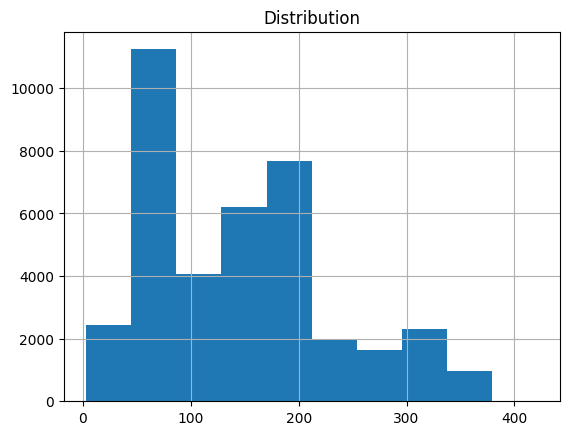

In [7]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

MARKDOWN_SEPARATORS = [
    "\n#{1,6}",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n__+\n",
    "\n\n",
    "\n",
    " ",
    ""
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)

docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs_processed += text_splitter.split_documents([doc])

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

fig = pd.Series(lengths).hist()
fig.set_title("Histogram of Document Lengths")
plt.title("Distribution")
plt.show()


In [8]:
from typing import Optional, List
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"

def split_documents(
        chunk_size: int,
        knowledge_base: list[LangchainDocument],
        tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )
    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)
    return docs_processed_unique

docs_processed = split_documents(512, RAW_KNOWLEDGE_BASE, tokenizer_name=EMBEDDING_MODEL_NAME)
print(len(docs_processed))
print(docs_processed[0:3])


10498
[Document(metadata={'start_index': 99}, page_content="caption                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  hashtags              best_time                                                                                                                                                                                    

In [9]:
# !pip install transformers
!pip install sentence-transformers faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 54.2 MB/s eta 0:00:00


In [10]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import torch

print(torch.cuda.is_available())

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed,
    embedding_model,
    distance_strategy=DistanceStrategy.COSINE,
)


True


<ipython-input-10-f6e3ec9fdfde>:8: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.4,
    "do_sample": False,
}


config.json:   0%|          | 0.00/3.48k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [12]:


prompt_chat = [
    {
        "role": "system",
"content": """You are a specialized assistant (chatbot for the social sahayak website) designed to handle queries and provide information exclusively related to social media topics.
Your first step is to search the context provided to you to extract relevant answers related to social media, influencers, and related domains. If the context does not provide enough information, respond by saying
'I am sorry, I cannot find the answer as I am a chatbot for the social sahayak website, and I can only answer questions based on the provided context about social media topics.'
"""
    },
    {
        "role": "user",
        "content": """Context:
{context}
---
Now here is the question you need to answer.
Question: {question}"""
    }
]

RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_chat, tokenize=False, add_generation_prompt=True,
)
print(RAG_PROMPT_TEMPLATE)



<|system|>
You are a specialized assistant (chatbot for the social sahayak website) designed to handle queries and provide information exclusively related to social media topics.
Your first step is to search the context provided to you to extract relevant answers related to social media, influencers, and related domains. If the context does not provide enough information, respond by saying
'I am sorry, I cannot find the answer as I am a chatbot for the social sahayak website, and I can only answer questions based on the provided context about social media topics.'
<|end|>
<|user|>
Context:
{context}
---
Now here is the question you need to answer.
Question: {question}<|end|>
<|assistant|>



In [13]:
u_query = "provide me some hashtags related to cooking post"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.4` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48


YOUR QUESTION:
 provide me some hashtags related to cooking post 

MICROSOFT 128K ANSWER: 
  Based on the context provided, here is a suggested new title, relevant hashtags, and the optimal time and day to post:

New Title: "Revitalize Your Kitchen: Post Lockdown Italian Cooking Recipes"

Relevant Hashtags:
1. #PostLockdownCooking
2. #ItalianRecipes
3. #KitchenCooking
4. #FoodRecipes
5. #HyderabadFoodies
6. #CiGustaHyderabad
7. #StreetByteFood
8. #SillyMonks
9. #StayHomeCooking
10. #StaySafeCooking
11. #FoodLovers
12. #Foodie
13. #CookingWithLove
14. #FoodieJourney
15. #FoodieAdventure
16. #FoodieDelight
17. #FoodieExploration
18. #FoodieExperience
19. #FoodieInspiration
20. #FoodiePassion

Optimal Time and Day to Post:
Based on the context, the post was published on a Friday at 13:44:40. To maximize engagement, it is recommended to post during peak hours when the target audience is most active. In this case, the optimal time to post would be on a weekday evening, around 6:00 PM to 8:0

In [15]:
u_query = "provide me some more?"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

YOUR QUESTION:
 provide me some more? 

MICROSOFT 128K ANSWER: 
  Based on the context provided, here are some suggestions for a new title, relevant hashtags, and the optimal time and day to post:

New Title: "Is More Food Always Better? #foodie #foodchallenge #healthyhabits"

Relevant Hashtags: #foodie, #foodchallenge, #healthyhabits, #nutrition, #balanceddiet, #portioncontrol, #mindfuleating, #foodtrends, #foodblogger, #foodvlog, #foodporn, #foodphotography, #foodreviews, #fooddiary, #foodjournal, #foodmemes, #foodtips, #foodfacts, #foodadvice, #foodblog, #foodlifestyle, #foodcommunity, #foodfestival, #foodcompetition, #foodrecipe, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpairing, #foodpai

In [16]:
u_query = "kmit college?"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

YOUR QUESTION:
 kmit college? 

MICROSOFT 128K ANSWER: 
  I am sorry, I cannot find the answer as I am a chatbot for the social sahayak website, and I can only answer questions based on the provided context about social media topics.


In [32]:
!pip install pyngrok
!pip install flask_cors
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTH_TOKEN' with the actual token you got from the ngrok dashboard
NGROK_AUTH_TOKEN = '2j5uCfuOTEBgec3LQw0w0uEsDOG_5jgwLbGTEdmBPzarF11gh'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Start ngrok tunnel
url = ngrok.connect(5000)
print('Public URL:', url)




up to date, audited 113 packages in 886ms

22 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities
node:internal/modules/cjs/loader:1031
  throw err;
  ^

Error: Cannot find module '/content/server.js'
    at Function.Module._resolveFilename (node:internal/modules/cjs/loader:1028:15)
    at Function.Module._load (node:internal/modules/cjs/loader:873:27)
    at Function.executeUserEntryPoint [as runMain] (node:internal/modules/run_main:81:12)
    at node:internal/main/run_main_module:22:47 {
  code: 'MODULE_NOT_FOUND',
  requireStack: []
}


In [33]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
from flask_cors import CORS

app = Flask(__name__)
CORS(app, resources={r"/*": {"origins": "http://localhost:3000"}})

@app.route('/process_question', methods=['POST'])
def process_question():
    data = request.get_json()
    question = data.get('question')

    # Replace the following lines with your own logic
    u_query = question
    retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query, k=3)
    context = retrieved_docs[0].page_content
    final_prompt = RAG_PROMPT_TEMPLATE.format(question=u_query, context=context)
    output = pipe(final_prompt, **generation_args)

    response = {
        'answer': output[0]['generated_text']
    }

    return jsonify(response)

if __name__ == '__main__':
    # Start ngrok tunnel
    url = ngrok.connect(5000)
    print('Public URL:', url)

    app.run()


Writing /content/server.js



up to date, audited 113 packages in 850ms

22 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities
Server is running on http://localhost:5000
Public URL: https://3a9b-34-124-227-82.ngrok-free.app
^C


SyntaxError: invalid syntax (<ipython-input-35-ffc9f1a724cf>, line 1)